In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Define the URL of the dataset
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv")
# Display the first few rows to ensure it loaded correctly
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [14]:
df.shape

(65437, 114)

# Section 1: Handling Duplicates
Task 1: Identify and remove duplicate rows.

In [4]:
df.duplicated().sum()

np.int64(20)

In [5]:
df=df.drop_duplicates()

In [6]:
df.duplicated().sum()

np.int64(0)

# Section 2: Handling Missing Values
Task 2: Identify missing values in CodingActivities.
Task 3: Impute missing values in CodingActivities with forward-fill.

In [7]:
df["CodingActivities"].isnull().sum()

np.int64(10971)

In [9]:
df['CodingActivities'] = df['CodingActivities'].ffill()

# Section 3: Normalizing Compensation Data¶
Task 4: Identify compensation-related columns, such as ConvertedCompYearly.
Normalization is commonly applied to compensation data to bring values within a comparable range. Here, you’ll identify ConvertedCompYearly or similar columns, which contain compensation information. This column will be used in the subsequent tasks for normalization.

In [11]:
for i in df.columns:
    if "comp" in i.lower():
        print(i)

CompTotal
AIComplex
ConvertedCompYearly


Task 5: Normalize ConvertedCompYearly using Min-Max Scaling.
Min-Max Scaling brings all values in a column to a 0-1 range, making it useful for comparing data across different scales. Here, you will apply Min-Max normalization to the ConvertedCompYearly column, creating a new column ConvertedCompYearly_MinMax with normalized values.

In [13]:
df["ConvertedCompYearly"].isnull().sum()

np.int64(42002)

In [18]:
df = df.dropna(subset=["ConvertedCompYearly"])

# MIN MAX

In [24]:
min_val = df['ConvertedCompYearly'].min()
max_val = df['ConvertedCompYearly'].max()

# Normalize işlemi
df.loc[:, "normalized_comp"] = (df['ConvertedCompYearly'] - min_val) / (max_val - min_val)


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,normalized_comp
72,73,I am a developer by profession,18-24 years old,"Employed, full-time;Student, full-time;Indepen...","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,100.0,100.0,100.0,50.0,90.0,Too long,Easy,7322.0,10.0,0.00045
374,375,"I am not primarily a developer, but I write co...",25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Written-based...,...,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,30074.0,NaN,0.00185


# Z SCORE

In [26]:
df.loc[:,"ConvertedCompYearly_Zscore"]=(df['ConvertedCompYearly'] - df['ConvertedCompYearly'].mean()) /df['ConvertedCompYearly'].std()

In [27]:
df.head(2)

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,normalized_comp,ConvertedCompYearly_MinMax,ConvertedCompYearly_Zscore
72,73,I am a developer by profession,18-24 years old,"Employed, full-time;Student, full-time;Indepen...","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,100.0,50.0,90.0,Too long,Easy,7322.0,10.0,0.00045,0.00045,-0.422117
374,375,"I am not primarily a developer, but I write co...",25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Written-based...,...,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,30074.0,NaN,0.00185,0.00185,-0.300290


# VISUALIZATION

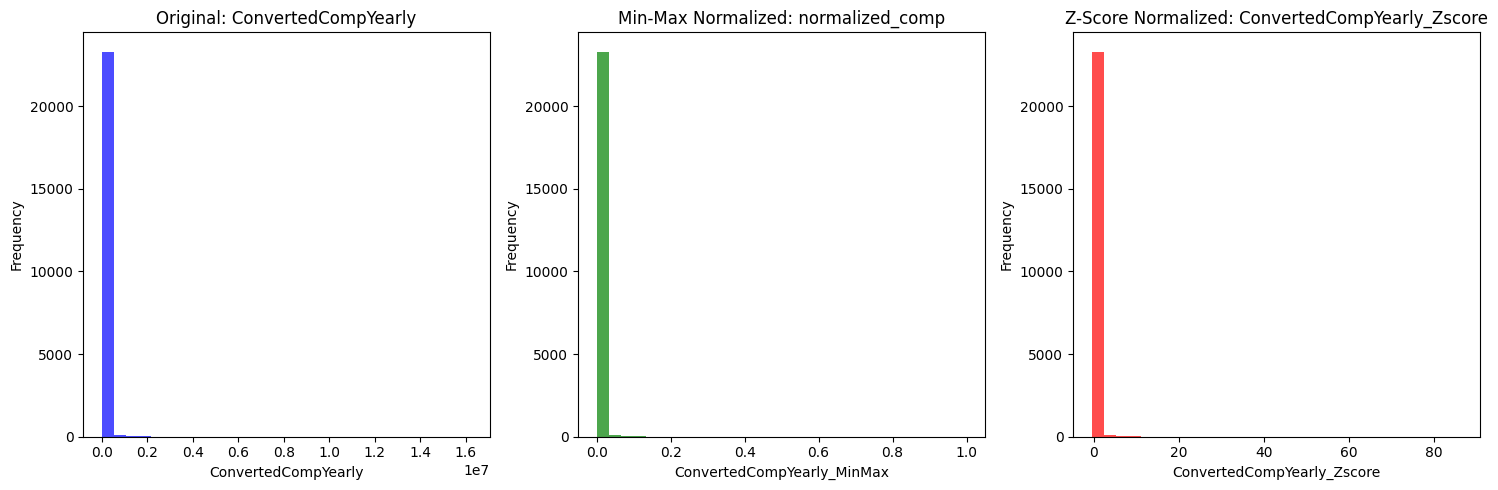

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original data histogram
axes[0].hist(df['ConvertedCompYearly'].dropna(), bins=30, color='blue', alpha=0.7)
axes[0].set_title('Original: ConvertedCompYearly')
axes[0].set_xlabel('ConvertedCompYearly')
axes[0].set_ylabel('Frequency')

# Min-Max Normalized data histogram
axes[1].hist(df['normalized_comp'].dropna(), bins=30, color='green', alpha=0.7)
axes[1].set_title('Min-Max Normalized: normalized_comp')
axes[1].set_xlabel('ConvertedCompYearly_MinMax')
axes[1].set_ylabel('Frequency')

# Z-score Normalized data histogram
axes[2].hist(df['ConvertedCompYearly_Zscore'].dropna(), bins=30, color='red', alpha=0.7)
axes[2].set_title('Z-Score Normalized: ConvertedCompYearly_Zscore')
axes[2].set_xlabel('ConvertedCompYearly_Zscore')
axes[2].set_ylabel('Frequency')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()